In [94]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin, sqrt
import matplotlib.pyplot as plt
import random
from math import dist

In [95]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom_trans(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(np.zeros(2*n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)


def pipeline_trans(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output


    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
    
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    
    
    
    
def new_xy(x,y,radius, num_samples):
    length = []
    angle = []
    for i in range(num_samples):
        length.append(sqrt(np.random.uniform(0, radius)))
        angle.append(np.random.uniform(0, 2*pi))

    X = []
    Y = []
    for i in range(num_samples):
        X.append(length[i] * np.cos(angle[i])+x)
        Y.append(length[i] * np.sin(angle[i])+y)
    
    #fig = plt.figure(figsize = (7, 7))
    #ax = plt.axes()
    #scatter = ax.scatter(X,Y)
    #plt.show()
    
    return X,Y 


def get_pixels2(num_pixels_x, num_pixels_y, window_x, window_y):
    sample1 = list(np.linspace(-window_x/2, window_x/2, num_pixels_x))
    sample2 = list(np.linspace(-window_y/2, window_y/2, num_pixels_y))
    pixels = []
    for i in range(len(sample1)):
        for j in range(len(sample2)):
            pixels.append((sample1[i],sample2[j]))     
    return pixels


def first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels2(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)

    while True:

        iso = isom(x,y,0)
        colors2 = new_colors(pixels, iso, image_function)
        distance1 = dist(colors1, colors2)

        X,Y = new_xy(x,y,radius,num_samples)

        dict_of_dists = {}
        dict_of_dists[(x,y)] = distance1
        for i in range(len(X)):
            iso = isom(X[i],Y[i],0)
            colors_new = new_colors(pixels, iso, image_function)
            dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
        new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)   
        
        #print(new_x,new_y)
    
        if new_x == x and new_y == y:
        
            print("switch")
        
            while True:

                iso = isom(x,y,0)
                colors2 = new_colors(pixels, iso, image_function)
                distance1 = dist(colors1, colors2)
        
                X,Y = new_xy(x,y,radius/4,num_samples)

                dict_of_dists = {}
                dict_of_dists[(x,y)] = distance1
                for i in range(len(X)):
                    iso = isom(X[i],Y[i],0)
                    colors_new = new_colors(pixels, iso, image_function = p3)
                    dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
                new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
            
                #print(new_new_x,new_new_y)
        
                if new_new_x == x and new_new_y == y:
                    distance = dict_of_dists[(x,y)]
                    print('done?')
                    break
                else: 
                    x,y = new_new_x,new_new_y
                    distance = dict_of_dists[(x,y)]
                    print(str(distance) + '2')
                
            break
                    
        else:  
            
            if sqrt(new_x**2 + new_y**2) < 2: 
                X = trans_x_bound * np.random.random(1) - trans_x_bound/2
                Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
                x = X[0]
                y = Y[0]
                print('restart')
                
            else:
                x,y = new_x,new_y
                distance = dict_of_dists[(x,y)]
                print(str(distance) + '1') 
    
    return x,y


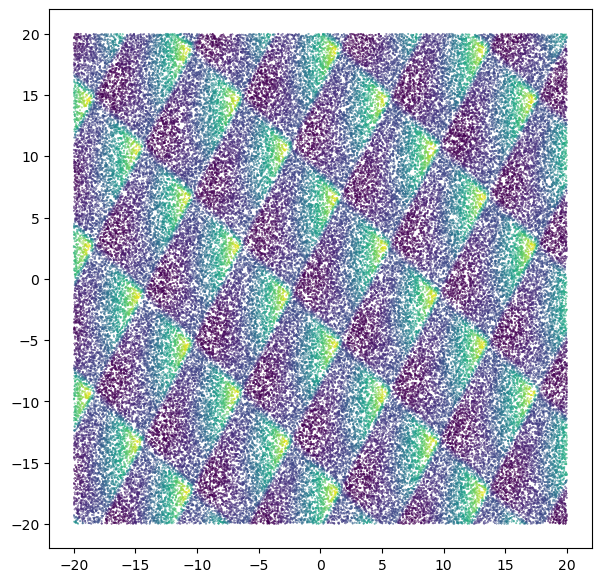

In [4]:
def angelica3(x):
    if 0 <= x%12 <= 8:
        f = .25 * (x % 12) + 1
    elif 8 <= x%12 <= 9:
        f = -2 * (x%12) + 18 +1
    else:
        f = 1
    return f

def mult33(x,y):
    return angelica3(x+y) * angelica3(2*x-y)

graph_continuous(mult33,20,20)

In [68]:
image_function = mult33
window_x = 50 # size of window in x-axis
window_y = 50 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 20 # length of interval to choose x-translation from 
trans_y_bound = 20 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

118.771952970261541
switch
done?


(7.633796131208581, -8.985501886611107)

In [69]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

124.321313237325971
switch
done?


(-4.204761718939915, 4.815285147953032)

In [96]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

189.443730591341081
176.133715709538281
149.691289872796571
99.96514804111661
45.55708636859731
22.476505138777831
17.6857479040686171
5.5137507098053131
switch
done?


(-0.10426853407211589, 22.961325822936548)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


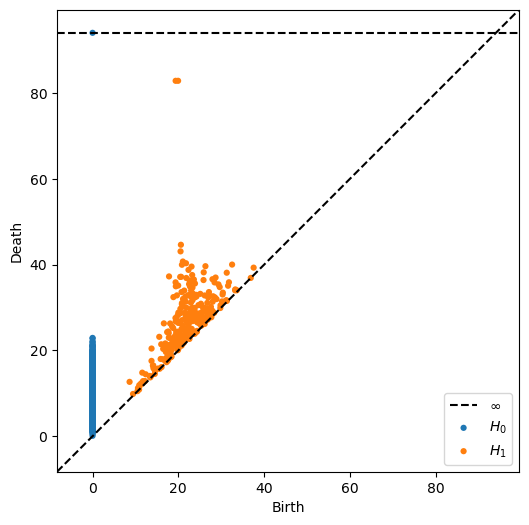

In [5]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [6]:
persistent_H1_intervals(output)

[63.52089309692383,
 62.95128059387207,
 24.05024528503418,
 22.588171005249023,
 19.67853546142578,
 19.430435180664062,
 19.141429901123047,
 18.54652976989746,
 16.710834503173828,
 16.53034019470215,
 16.522903442382812,
 16.470111846923828,
 16.41387367248535,
 15.543838500976562,
 15.173074722290039,
 15.04542350769043,
 14.357904434204102,
 13.719358444213867,
 13.587617874145508,
 13.324666976928711,
 13.252466201782227,
 13.176471710205078,
 12.964395523071289,
 12.919513702392578,
 12.865745544433594,
 12.572151184082031,
 12.298595428466797,
 12.200994491577148,
 11.73298454284668,
 11.354848861694336,
 10.984182357788086,
 10.911148071289062,
 10.909547805786133,
 10.560197830200195,
 10.543010711669922,
 10.53948974609375,
 10.196800231933594,
 10.02332878112793,
 9.929281234741211,
 9.763420104980469,
 9.680036544799805,
 9.626394271850586,
 9.561439514160156,
 9.513040542602539,
 9.230083465576172,
 9.157472610473633,
 8.804094314575195,
 8.725467681884766,
 8.6477375030

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


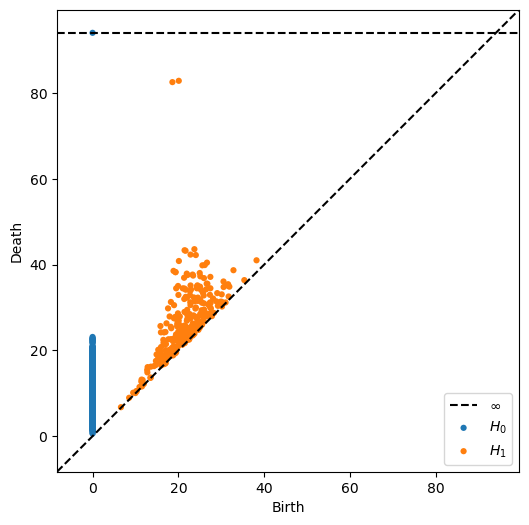

In [7]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [8]:
persistent_H1_intervals(output)

[63.90851974487305,
 62.73198318481445,
 21.891109466552734,
 21.54531478881836,
 20.707242965698242,
 19.851558685302734,
 19.65798568725586,
 19.491945266723633,
 18.90851402282715,
 18.88799476623535,
 18.15245246887207,
 15.93310546875,
 15.589170455932617,
 15.44118881225586,
 15.084115982055664,
 14.973173141479492,
 14.35392951965332,
 14.228841781616211,
 13.990015029907227,
 13.785404205322266,
 13.729738235473633,
 13.42695426940918,
 13.05374526977539,
 13.02297592163086,
 13.014030456542969,
 12.91157341003418,
 12.42828369140625,
 12.296314239501953,
 12.197566986083984,
 12.143220901489258,
 11.543548583984375,
 11.238407135009766,
 11.084465026855469,
 10.884796142578125,
 10.762941360473633,
 10.70628547668457,
 10.601875305175781,
 10.566694259643555,
 10.26848030090332,
 10.151895523071289,
 10.142202377319336,
 9.949419021606445,
 9.847922325134277,
 9.808101654052734,
 9.672048568725586,
 9.067144393920898,
 8.956287384033203,
 8.790872573852539,
 8.764328002929688,

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


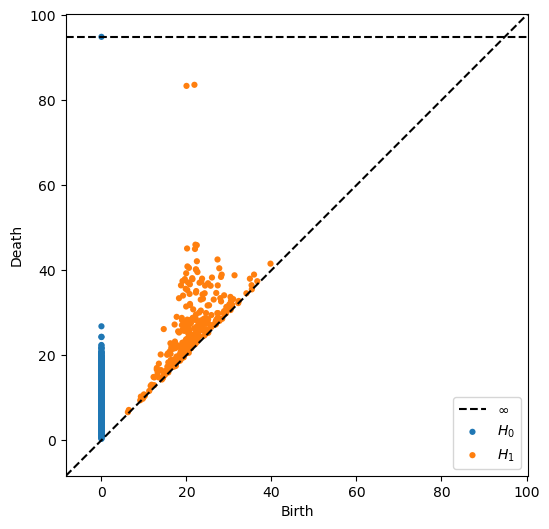

In [107]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 20, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [108]:
persistent_H1_intervals(output)

[63.33802795410156,
 61.7290153503418,
 24.953712463378906,
 23.88393211364746,
 23.449851989746094,
 22.978975296020508,
 20.647714614868164,
 19.948505401611328,
 19.641632080078125,
 19.327281951904297,
 18.363798141479492,
 18.282367706298828,
 17.995376586914062,
 17.751745223999023,
 17.71180534362793,
 16.961374282836914,
 16.757339477539062,
 16.75557518005371,
 16.462182998657227,
 15.863388061523438,
 15.800003051757812,
 15.204608917236328,
 15.156864166259766,
 15.118537902832031,
 14.829496383666992,
 14.334272384643555,
 13.964763641357422,
 13.843938827514648,
 13.663480758666992,
 12.788286209106445,
 12.718513488769531,
 12.489858627319336,
 12.26405143737793,
 11.996574401855469,
 11.845703125,
 11.518272399902344,
 11.484171867370605,
 11.316320419311523,
 11.225591659545898,
 10.92669677734375,
 10.661863327026367,
 10.640291213989258,
 10.514335632324219,
 10.28715705871582,
 10.283344268798828,
 9.998163223266602,
 9.869464874267578,
 9.708761215209961,
 9.3965377

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


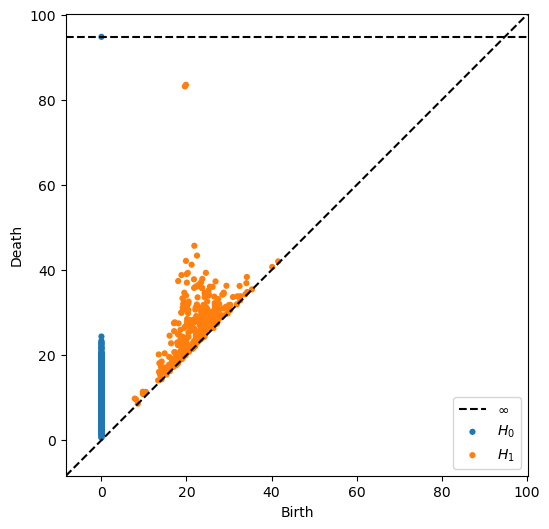

In [109]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 20, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [110]:
persistent_H1_intervals(output)

[63.700958251953125,
 63.5711669921875,
 23.879289627075195,
 22.282344818115234,
 20.926467895507812,
 20.063426971435547,
 19.99932289123535,
 19.385467529296875,
 19.038833618164062,
 19.01813507080078,
 16.969924926757812,
 16.07957649230957,
 15.197465896606445,
 14.790157318115234,
 14.302846908569336,
 14.200098037719727,
 14.119832992553711,
 14.030099868774414,
 13.954900741577148,
 13.708969116210938,
 13.671741485595703,
 13.650701522827148,
 13.365253448486328,
 13.161520004272461,
 12.789764404296875,
 12.284931182861328,
 12.169244766235352,
 12.111639022827148,
 12.10211181640625,
 12.029001235961914,
 11.707269668579102,
 11.429664611816406,
 11.271842956542969,
 11.114324569702148,
 10.979410171508789,
 10.978084564208984,
 10.589773178100586,
 10.507991790771484,
 10.47500991821289,
 10.458194732666016,
 10.290853500366211,
 10.27591323852539,
 10.178165435791016,
 10.037168502807617,
 9.911169052124023,
 9.49118423461914,
 9.477519989013672,
 9.442974090576172,
 9.34

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


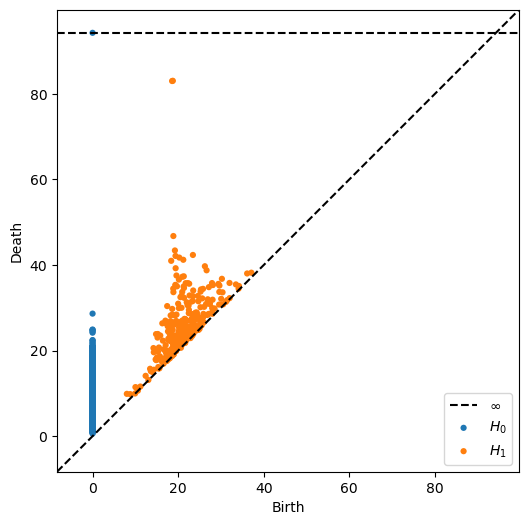

In [111]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [112]:
persistent_H1_intervals(output)

[64.41874694824219,
 64.29747200012207,
 27.892534255981445,
 24.161462783813477,
 22.73860740661621,
 22.60868263244629,
 21.470590591430664,
 20.025615692138672,
 19.839853286743164,
 18.904958724975586,
 17.945615768432617,
 16.41965103149414,
 16.28116798400879,
 16.041379928588867,
 16.018327713012695,
 15.845705032348633,
 15.622982025146484,
 15.296051025390625,
 14.76734733581543,
 14.000106811523438,
 13.703996658325195,
 13.50300407409668,
 13.469818115234375,
 13.281686782836914,
 13.051063537597656,
 12.965837478637695,
 12.768800735473633,
 12.123268127441406,
 12.053705215454102,
 11.956235885620117,
 11.133071899414062,
 10.963895797729492,
 10.958005905151367,
 10.529922485351562,
 10.215627670288086,
 10.073284149169922,
 9.980222702026367,
 9.967641830444336,
 9.764549255371094,
 9.748645782470703,
 9.447128295898438,
 9.295536041259766,
 9.271583557128906,
 9.215333938598633,
 9.019657135009766,
 8.96971321105957,
 8.947538375854492,
 8.810956954956055,
 8.6583328247

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


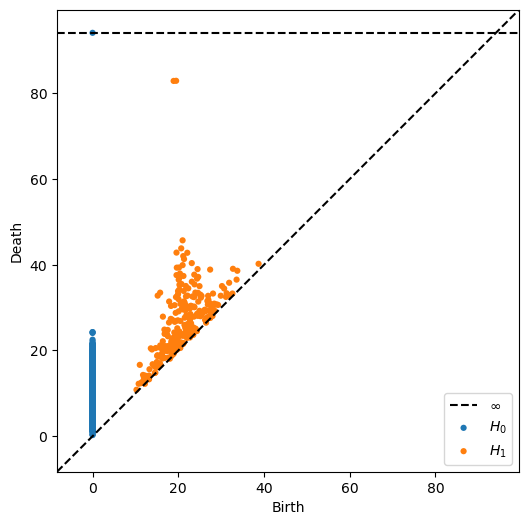

In [113]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

In [114]:
persistent_H1_intervals(output)

[63.98350143432617,
 63.43482780456543,
 24.694408416748047,
 23.256155014038086,
 23.146732330322266,
 20.869455337524414,
 20.692584991455078,
 19.989362716674805,
 19.67418098449707,
 19.184770584106445,
 18.90365982055664,
 17.995845794677734,
 17.72261905670166,
 17.610051155090332,
 17.56297492980957,
 17.23810386657715,
 16.7174129486084,
 16.41351890563965,
 16.180925369262695,
 15.066192626953125,
 14.847955703735352,
 14.761837005615234,
 14.492498397827148,
 13.976573944091797,
 13.958169937133789,
 13.911895751953125,
 13.557659149169922,
 13.28071403503418,
 13.216758728027344,
 12.993902206420898,
 12.97085952758789,
 12.886695861816406,
 12.612234115600586,
 12.515562057495117,
 12.372858047485352,
 12.164560317993164,
 12.084049224853516,
 11.900886535644531,
 11.643352508544922,
 11.484315872192383,
 11.434234619140625,
 11.431941986083984,
 10.821609497070312,
 10.657299041748047,
 10.37263298034668,
 10.142345428466797,
 10.123531341552734,
 10.05703353881836,
 9.727

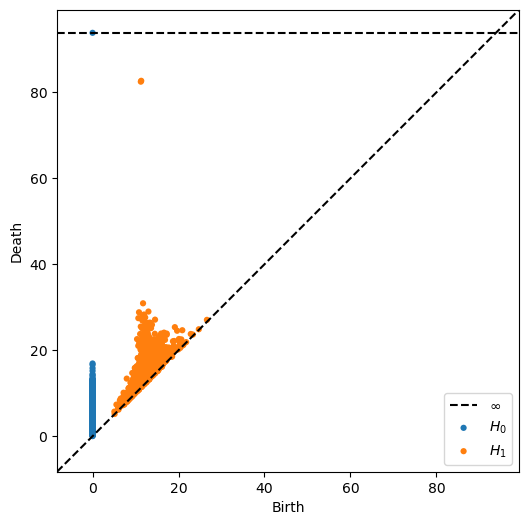

In [118]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 3000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [119]:
persistent_H1_intervals(output)

[71.36388969421387,
 71.25841903686523,
 19.172987937927246,
 18.019404411315918,
 16.8087797164917,
 16.332157135009766,
 16.30975914001465,
 15.99898624420166,
 15.55938720703125,
 15.37636661529541,
 15.352398872375488,
 15.113149642944336,
 15.000246047973633,
 14.287102699279785,
 13.798590660095215,
 13.759411811828613,
 13.69628620147705,
 13.59294605255127,
 13.36503791809082,
 13.308364868164062,
 13.0864896774292,
 13.016542434692383,
 12.906845092773438,
 12.784821510314941,
 12.702576637268066,
 12.584463119506836,
 12.232752799987793,
 12.190391540527344,
 12.115104675292969,
 12.08541202545166,
 11.721125602722168,
 11.679227828979492,
 11.585437774658203,
 11.582764625549316,
 11.544920921325684,
 11.48091983795166,
 11.296459197998047,
 11.163698196411133,
 11.121833801269531,
 11.107236862182617,
 11.1022367477417,
 11.044476509094238,
 10.973184585571289,
 10.918389320373535,
 10.90406608581543,
 10.803996086120605,
 10.71245002746582,
 10.700264930725098,
 10.6365823

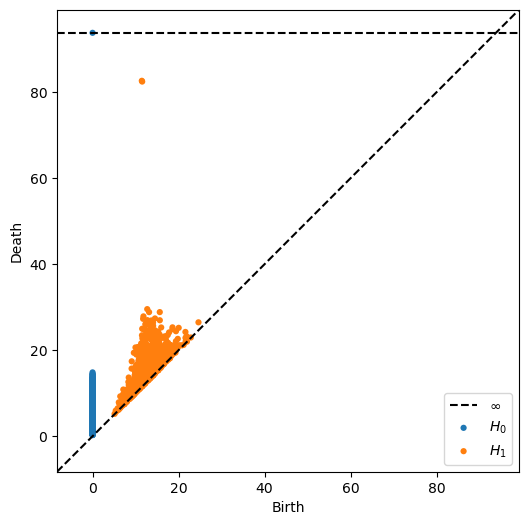

In [120]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 10, n_isos = 3000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [121]:
persistent_H1_intervals(output)

[71.17934703826904,
 70.91540431976318,
 16.82896137237549,
 16.02348518371582,
 15.701927185058594,
 15.530460357666016,
 14.246539115905762,
 13.816723823547363,
 13.681180953979492,
 13.440378189086914,
 13.409469604492188,
 13.236593246459961,
 13.2247896194458,
 13.181827545166016,
 12.901926040649414,
 12.865994453430176,
 12.834284782409668,
 12.817415237426758,
 12.595510482788086,
 12.479580879211426,
 12.4382905960083,
 12.345428466796875,
 11.97036075592041,
 11.573445320129395,
 11.572713851928711,
 11.561470031738281,
 11.318737030029297,
 11.311192512512207,
 11.259866714477539,
 11.141349792480469,
 11.117207527160645,
 11.018743515014648,
 10.94115161895752,
 10.699377059936523,
 10.650856971740723,
 10.629610061645508,
 10.551787376403809,
 10.50370979309082,
 10.351212501525879,
 10.295136451721191,
 10.257245063781738,
 10.157181739807129,
 10.147706031799316,
 10.141210556030273,
 10.12760066986084,
 10.06852912902832,
 10.014206886291504,
 9.931042671203613,
 9.924

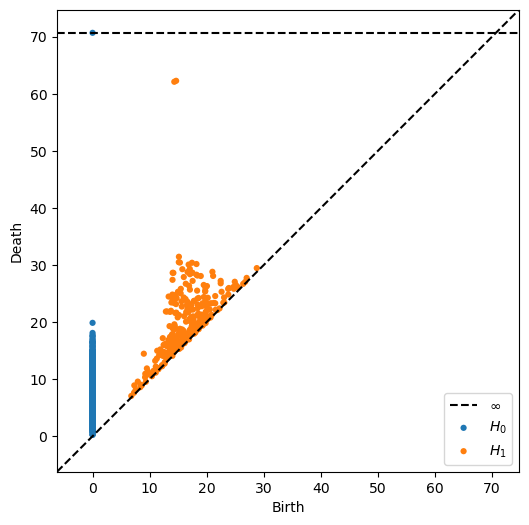

In [103]:
output = pipeline_trans(image_function = mult33, num_pixels = 30 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [104]:
persistent_H1_intervals(output)

[47.77700614929199,
 47.62515830993652,
 16.312719345092773,
 15.379781723022461,
 15.120401382446289,
 14.596294403076172,
 14.451004981994629,
 13.52706527709961,
 13.38862133026123,
 13.240455627441406,
 12.966190338134766,
 12.283435821533203,
 12.128141403198242,
 11.956302642822266,
 11.896806716918945,
 11.327630996704102,
 11.19257926940918,
 11.175771713256836,
 11.137711524963379,
 10.818379402160645,
 10.377416610717773,
 10.357185363769531,
 10.338813781738281,
 10.180408477783203,
 10.105064392089844,
 9.985546112060547,
 9.786869049072266,
 9.68072509765625,
 9.611124038696289,
 9.585992813110352,
 9.455070495605469,
 9.449875831604004,
 9.105680465698242,
 9.040294647216797,
 9.000536918640137,
 8.804247856140137,
 8.623466491699219,
 8.527606964111328,
 8.335592269897461,
 8.23528003692627,
 8.199995994567871,
 8.033987045288086,
 7.809276580810547,
 7.735509872436523,
 7.183292388916016,
 7.120929718017578,
 7.068120956420898,
 7.02903938293457,
 7.01939582824707,
 6.9

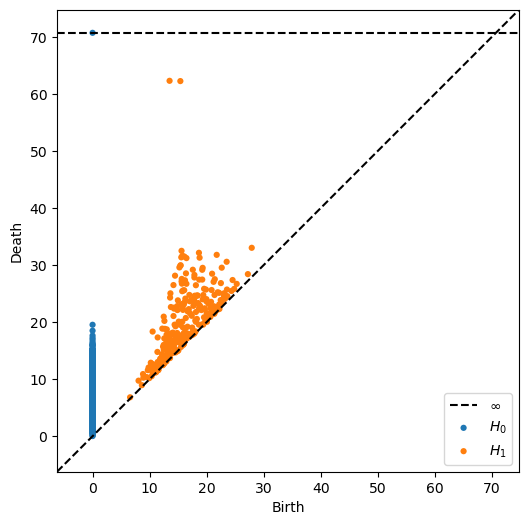

In [105]:
output = pipeline_trans(image_function = mult33, num_pixels = 30 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [106]:
persistent_H1_intervals(output)

[48.78972816467285,
 46.85011386871338,
 16.896041870117188,
 15.875968933105469,
 15.802532196044922,
 15.376106262207031,
 14.756738662719727,
 14.517210960388184,
 14.501457214355469,
 14.359346389770508,
 13.676496505737305,
 13.502721786499023,
 12.527288436889648,
 12.307600021362305,
 12.164052963256836,
 11.934637069702148,
 11.603134155273438,
 11.5221586227417,
 11.393876075744629,
 11.226030349731445,
 11.125482559204102,
 11.074732780456543,
 10.706552505493164,
 10.41116714477539,
 10.262580871582031,
 10.210987091064453,
 10.02735710144043,
 9.969141006469727,
 9.945951461791992,
 9.699385643005371,
 9.661201477050781,
 9.515899658203125,
 8.908249855041504,
 8.85448169708252,
 8.75214958190918,
 8.47936725616455,
 8.350919723510742,
 8.229759216308594,
 8.226301193237305,
 8.083873748779297,
 7.952714920043945,
 7.851057052612305,
 7.809910774230957,
 7.78887939453125,
 7.6111249923706055,
 7.544936180114746,
 7.528257369995117,
 7.397394180297852,
 7.375005722045898,
 7

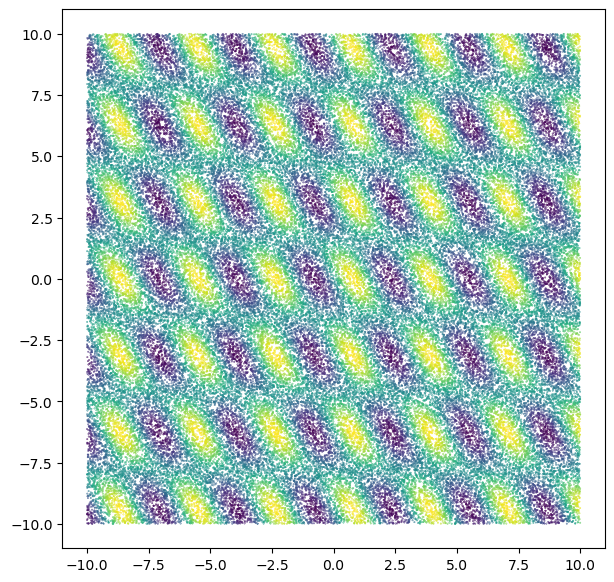

In [10]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

graph_continuous(sincos,10,10)

In [70]:
image_function = sincos
window_x = 20 # size of window in x-axis
window_y = 20 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 10 # length of interval to choose x-translation from 
trans_y_bound = 10 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

36.022541170511931
28.853956941594191
17.7803907247738741
16.2267051008646241
switch
done?


(-0.053951950422829784, -9.593024503365204)

In [71]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

14.1753364091487711
switch
done?


(3.3322296158399225, -3.4045835912193954)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


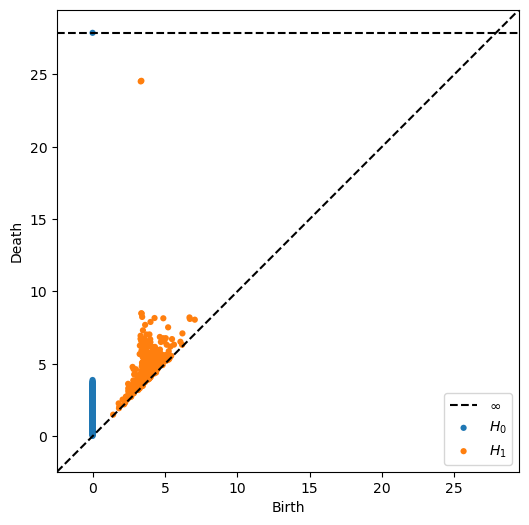

In [90]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [91]:
persistent_H1_intervals(output)

[21.192081689834595,
 21.18796992301941,
 5.127462148666382,
 5.082357168197632,
 4.81448769569397,
 4.059755563735962,
 3.8903002738952637,
 3.884037971496582,
 3.8346805572509766,
 3.6233272552490234,
 3.413965940475464,
 3.296945095062256,
 3.2578954696655273,
 3.2172670364379883,
 3.166745901107788,
 3.1033895015716553,
 3.026148557662964,
 2.991331100463867,
 2.7725350856781006,
 2.75850248336792,
 2.727043867111206,
 2.7124979496002197,
 2.659071683883667,
 2.528654098510742,
 2.5040876865386963,
 2.496426820755005,
 2.493999719619751,
 2.4315185546875,
 2.4195938110351562,
 2.3427882194519043,
 2.325253963470459,
 2.3016982078552246,
 2.209319591522217,
 2.1901047229766846,
 2.1701951026916504,
 2.119976043701172,
 2.098365306854248,
 2.080418586730957,
 2.0225772857666016,
 2.022470474243164,
 2.003037214279175,
 1.988825798034668,
 1.9638183116912842,
 1.887587070465088,
 1.8599576950073242,
 1.8047239780426025,
 1.7882733345031738,
 1.7867305278778076,
 1.7848026752471924,
 1

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


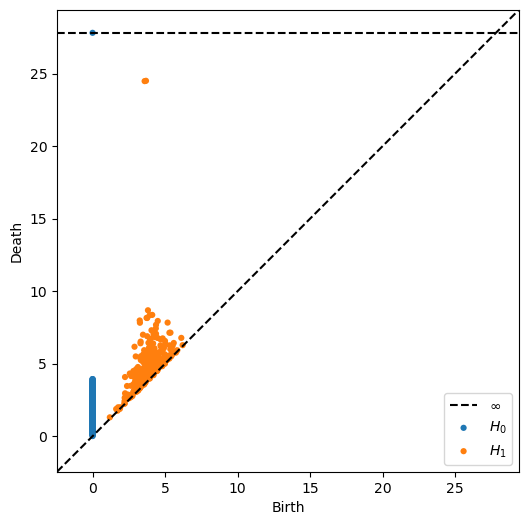

In [92]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [93]:
persistent_H1_intervals(output)

[20.897513151168823,
 20.82763671875,
 4.863132953643799,
 4.727424621582031,
 4.558119773864746,
 4.4338133335113525,
 4.407285213470459,
 4.3840491771698,
 4.250929355621338,
 3.522850513458252,
 3.4498114585876465,
 3.3038058280944824,
 3.275529623031616,
 3.241590976715088,
 3.2071096897125244,
 3.125178337097168,
 3.1019792556762695,
 3.073977470397949,
 2.847853183746338,
 2.7524662017822266,
 2.6873373985290527,
 2.658514976501465,
 2.6503772735595703,
 2.591440200805664,
 2.5837883949279785,
 2.5230917930603027,
 2.371290683746338,
 2.3150079250335693,
 2.300847053527832,
 2.289262294769287,
 2.216815948486328,
 2.203882932662964,
 2.1815881729125977,
 2.1464924812316895,
 2.1166841983795166,
 2.1148431301116943,
 2.0812268257141113,
 2.0227537155151367,
 1.9833393096923828,
 1.9427766799926758,
 1.9364252090454102,
 1.9165964126586914,
 1.916435718536377,
 1.9121408462524414,
 1.8709285259246826,
 1.8676714897155762,
 1.8407716751098633,
 1.8342275619506836,
 1.794126033782959

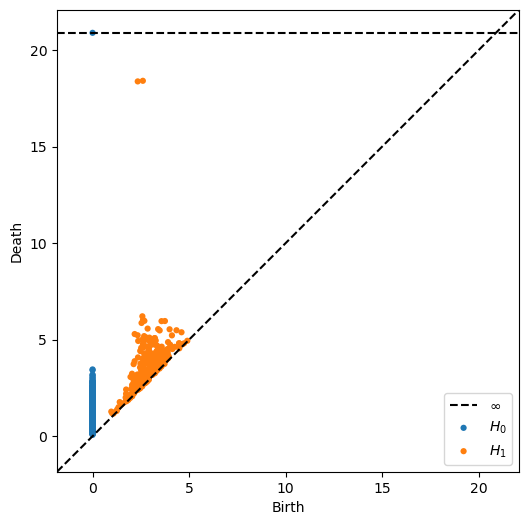

In [97]:
output = pipeline_trans(image_function = sincos, num_pixels = 30 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [99]:
persistent_H1_intervals(output)

[16.04267406463623,
 15.80865478515625,
 3.6321091651916504,
 3.415555715560913,
 3.328415870666504,
 3.290905714035034,
 3.111581563949585,
 2.89310884475708,
 2.7212069034576416,
 2.5705628395080566,
 2.5123205184936523,
 2.4214179515838623,
 2.4035162925720215,
 2.3888754844665527,
 2.355376958847046,
 2.3084845542907715,
 2.2959935665130615,
 2.2681362628936768,
 2.2463841438293457,
 2.2177112102508545,
 2.189387083053589,
 2.1663618087768555,
 2.1601171493530273,
 2.150252103805542,
 2.063814640045166,
 2.060537099838257,
 2.0591206550598145,
 2.0014538764953613,
 1.9615859985351562,
 1.9554016590118408,
 1.9295768737792969,
 1.9262363910675049,
 1.8637845516204834,
 1.8582100868225098,
 1.8574309349060059,
 1.781484603881836,
 1.7569081783294678,
 1.728851318359375,
 1.7240962982177734,
 1.705575704574585,
 1.6808688640594482,
 1.676652431488037,
 1.6189913749694824,
 1.6144959926605225,
 1.6055457592010498,
 1.5484435558319092,
 1.5412533283233643,
 1.5223655700683594,
 1.491400

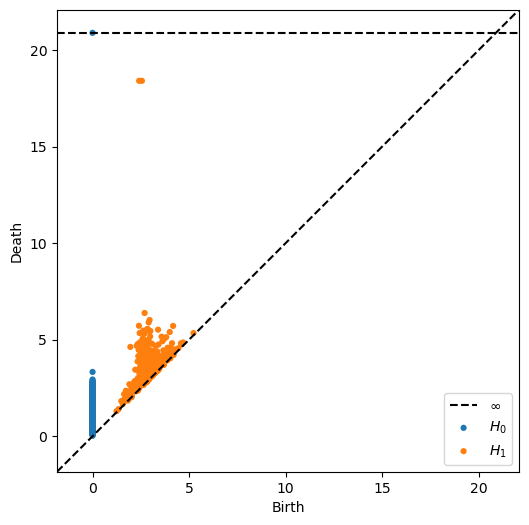

In [100]:
output = pipeline_trans(image_function = sincos, num_pixels = 30 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [101]:
persistent_H1_intervals(output)

[16.001211643218994,
 15.855740308761597,
 3.6875863075256348,
 3.3176019191741943,
 3.066523313522339,
 2.985450267791748,
 2.903916120529175,
 2.842681407928467,
 2.721752882003784,
 2.6888251304626465,
 2.66806960105896,
 2.62508487701416,
 2.4686532020568848,
 2.4666712284088135,
 2.4596431255340576,
 2.43483304977417,
 2.4063234329223633,
 2.4005115032196045,
 2.3341498374938965,
 2.2460577487945557,
 2.226313591003418,
 2.181137800216675,
 2.126256227493286,
 2.105942726135254,
 2.088563919067383,
 2.0546836853027344,
 2.0452346801757812,
 2.0289433002471924,
 2.026907444000244,
 1.9966323375701904,
 1.9237494468688965,
 1.9008550643920898,
 1.8414819240570068,
 1.7799913883209229,
 1.7655401229858398,
 1.7569530010223389,
 1.7524082660675049,
 1.720184087753296,
 1.6992387771606445,
 1.6876819133758545,
 1.5891547203063965,
 1.5789918899536133,
 1.5757699012756348,
 1.5395441055297852,
 1.5388984680175781,
 1.53114914894104,
 1.4883944988250732,
 1.4180397987365723,
 1.415479898

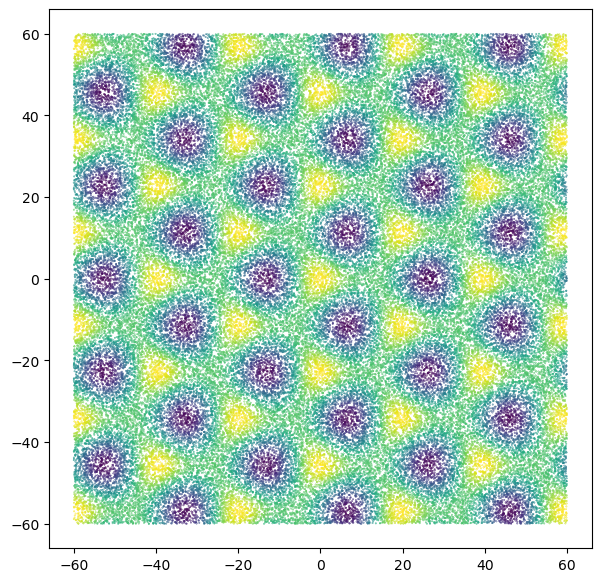

In [17]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

graph_continuous(p3,60,60)

In [72]:
image_function = p3
window_x = 200 # size of window in x-axis
window_y = 200 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

240.64464608981421
203.80977229965411
193.887145919859361
132.572000025703181
95.424166908416521
65.09184169358251
61.618957574829051
55.711803558516371
10.901708144614951
switch
8.5192629134851342
done?


(0.21022239585920288, -45.646503300373766)

In [73]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

179.886445659501621
126.962078249356671
66.104537145224431
33.0838343666816851
20.826125094877051
switch
6.8235300872362172
done?


(19.64696227481878, -34.33718158677477)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


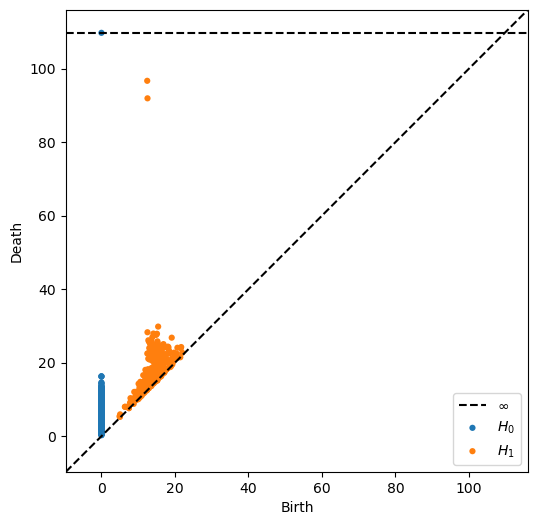

In [86]:
output = pipeline_trans(image_function = p3, num_pixels = 40 , window_size = 50, n_isos = 1000, x_translate= 1000 , y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

In [87]:
persistent_H1_intervals(output)

[84.24987030029297,
 79.40332126617432,
 15.75507926940918,
 14.3912992477417,
 13.781554222106934,
 13.320731163024902,
 13.09536361694336,
 12.787328720092773,
 12.762228012084961,
 12.682190895080566,
 12.670584678649902,
 12.4578275680542,
 11.902276992797852,
 11.468134880065918,
 10.96506118774414,
 10.567770004272461,
 10.332784652709961,
 10.30755615234375,
 10.274457931518555,
 10.213486671447754,
 10.111016273498535,
 10.014189720153809,
 9.989771842956543,
 9.866467475891113,
 9.816003799438477,
 9.533732414245605,
 9.393264770507812,
 9.383825302124023,
 9.32382583618164,
 9.227659225463867,
 8.88965892791748,
 8.722493171691895,
 8.658746719360352,
 8.549476623535156,
 8.344754219055176,
 8.184249877929688,
 8.12543773651123,
 8.09823989868164,
 7.9361419677734375,
 7.877743721008301,
 7.789304733276367,
 7.695562362670898,
 7.682893753051758,
 7.651277542114258,
 7.615850448608398,
 7.338649749755859,
 7.214427947998047,
 7.165251731872559,
 7.06403923034668,
 7.015112876

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


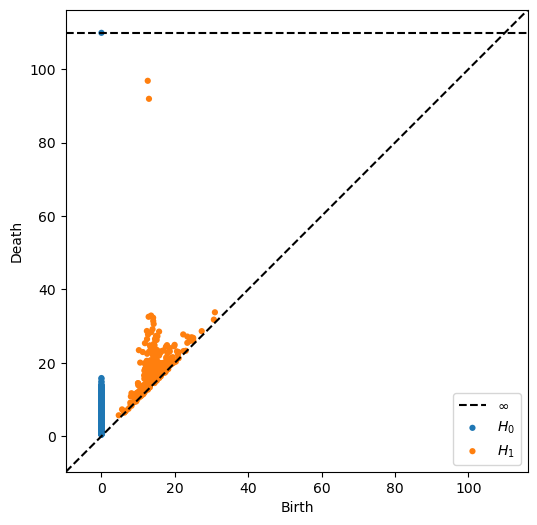

In [88]:
output = pipeline_trans(image_function = p3, num_pixels = 40 , window_size = 50, n_isos = 1000, x_translate= 1000 , y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

In [89]:
persistent_H1_intervals(output)

[84.23896789550781,
 78.99696826934814,
 19.682369232177734,
 19.344587326049805,
 18.19791316986084,
 17.28901481628418,
 16.353656768798828,
 16.285391807556152,
 15.239348411560059,
 15.019267082214355,
 14.792860984802246,
 14.043229103088379,
 13.489538192749023,
 13.242740631103516,
 12.791128158569336,
 12.4646577835083,
 11.988523483276367,
 11.90569019317627,
 11.674250602722168,
 11.57950496673584,
 11.489421844482422,
 11.19842529296875,
 10.876649856567383,
 10.68420124053955,
 10.336299896240234,
 10.045697212219238,
 10.006503105163574,
 9.816655158996582,
 9.486466407775879,
 9.068763732910156,
 8.888556480407715,
 8.812880516052246,
 8.680692672729492,
 8.590678215026855,
 8.199337005615234,
 8.199030876159668,
 8.184988975524902,
 8.128149032592773,
 8.071365356445312,
 7.958220481872559,
 7.313881874084473,
 7.14306640625,
 6.937170028686523,
 6.887922286987305,
 6.800407409667969,
 6.784135818481445,
 6.776679992675781,
 6.74627685546875,
 6.737025260925293,
 6.68834

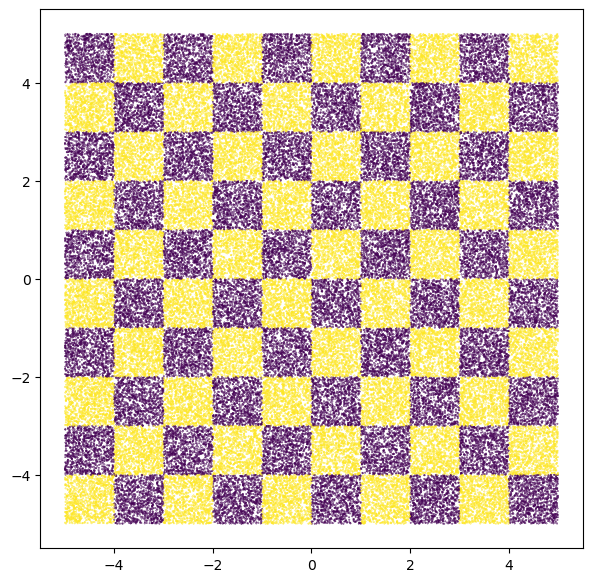

In [143]:
def checker(x,y): 
    if 0 <= x%2 < 1 and 0 <= y%2 < 1:
        res = 1 
    elif 1 <= x%2 < 2 and 1 <= y%2 < 2:
        res = 1
    else: 
        res = 0
    return res

graph_continuous(checker, 5,5)

In [144]:
image_function = checker
window_x = 20 # size of window in x-axis
window_y = 20 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 10 # length of interval to choose x-translation from 
trans_y_bound = 10 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

41.521078984053391
switch
done?


(-2.0695229551793597, 3.900686506259759)

In [145]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

50.6951674225463051
39.2937654087771
switch
done?


(-1.9739531010831435, -4.12815050644303)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


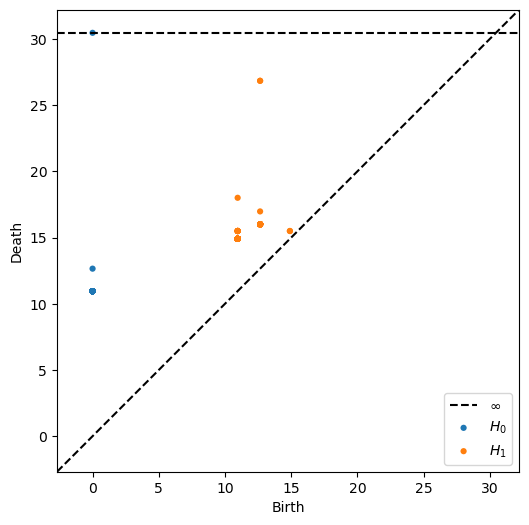

In [146]:
output = pipeline_trans(image_function = checker, num_pixels = 40 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [147]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 7.045548439025879,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.321451187133789,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


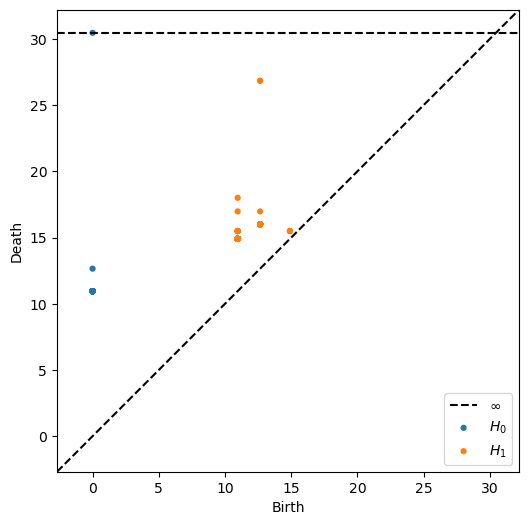

In [148]:
output = pipeline_trans(image_function = checker, num_pixels = 40 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [149]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 7.045548439025879,
 6.016110420227051,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.321451187133789,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3

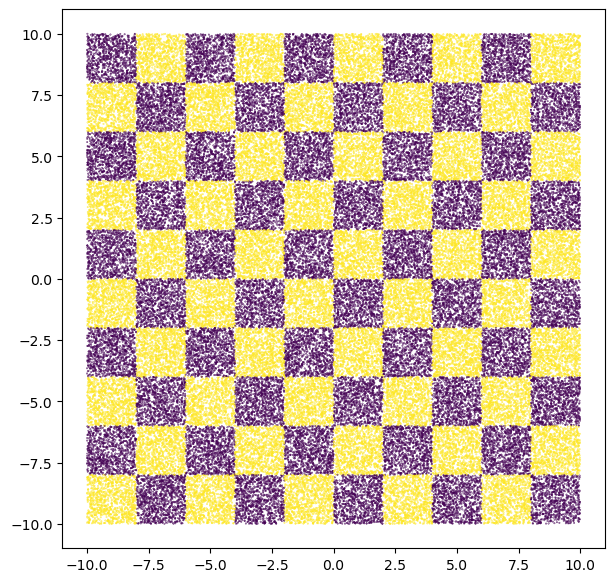

In [137]:
def checker2(x,y): 
    if 0 <= x%4 < 2 and 0 <= y%4 < 2:
        res = 1 
    elif 2 <= x%4 < 4 and 2 <= y%4 < 4:
        res = 1
    else: 
        res = 0
    return res
graph_continuous(checker2, 10,10)

In [138]:
image_function = checker2
window_x = 20 # size of window in x-axis
window_y = 20 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 10 # length of interval to choose x-translation from 
trans_y_bound = 10 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

52.535702146254791
41.76122603564221
36.1939221417077161
switch
done?


(8.182026156603312, 0.10970173739678035)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


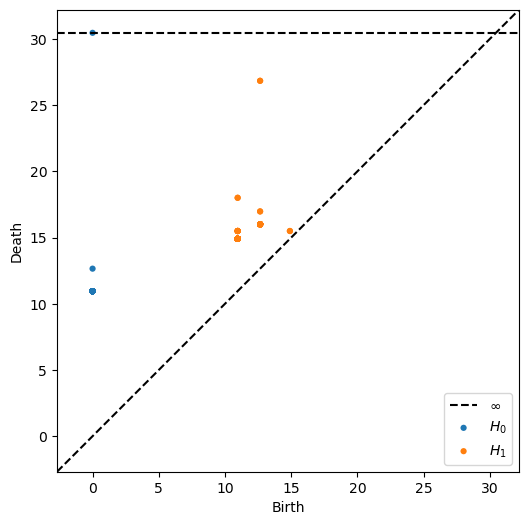

In [139]:
output = pipeline_trans(image_function = checker2, num_pixels = 40 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [140]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 7.045548439025879,
 7.045548439025879,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.321451187133789,
 4.321451187133789,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.94

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


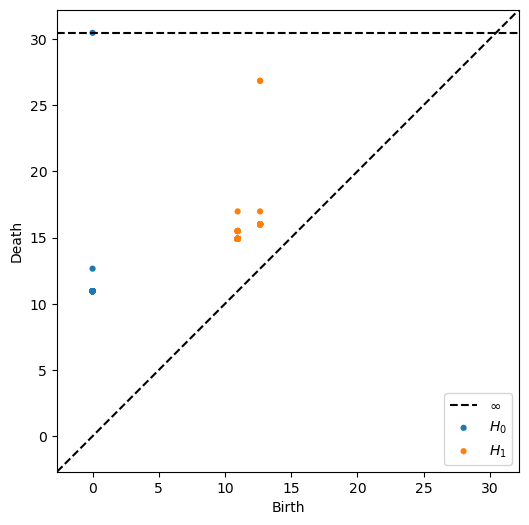

In [141]:
output = pipeline_trans(image_function = checker2, num_pixels = 40 , window_size = 6, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [142]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 6.016110420227051,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.321451187133789,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.9452133178710938,
 3.

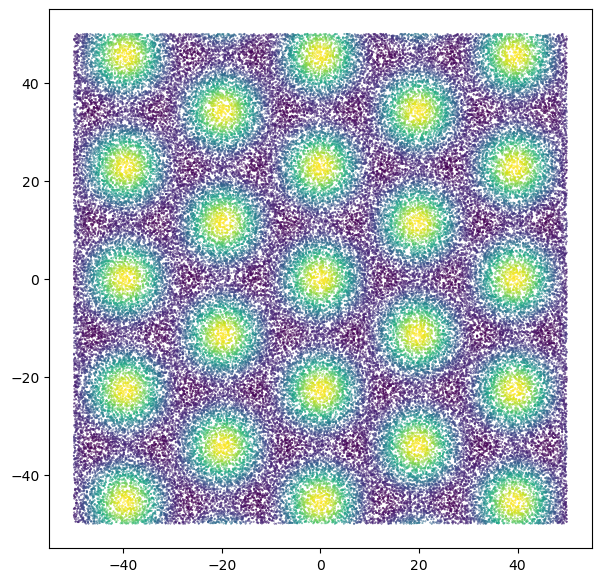

In [36]:
def p6(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C 

graph_continuous(p6, 50,50)

In [76]:
image_function = p6
window_x = 200 # size of window in x-axis
window_y = 200 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = 10 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

26.380232288725041
8.017493989931191
switch
done?


(0.1830703286543997, -45.3619425047141)

In [77]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

restart
30.184999983794711
switch
done?


(-0.7013303916166331, 44.74763171447438)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


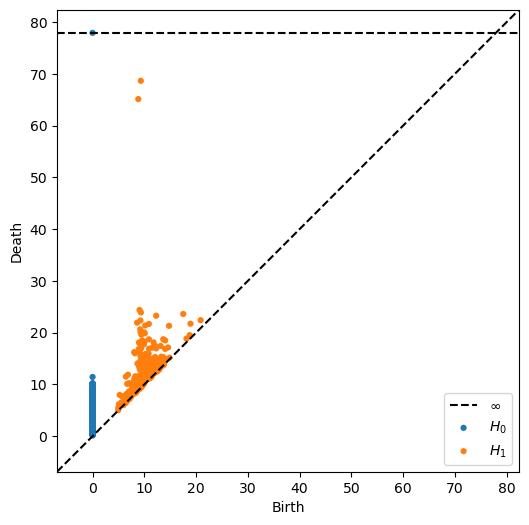

In [78]:
output = pipeline_trans(image_function = p6, num_pixels = 40 , window_size = 50, n_isos = 1000, x_translate= 1000 , y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

In [79]:
persistent_H1_intervals(output)

[59.32810306549072,
 56.286394119262695,
 15.318737983703613,
 14.559233665466309,
 13.322601318359375,
 13.097585678100586,
 11.422755241394043,
 11.213863372802734,
 10.984371185302734,
 10.84795093536377,
 10.811376571655273,
 10.189702987670898,
 10.092113494873047,
 9.794903755187988,
 9.137568473815918,
 8.930377006530762,
 8.6675443649292,
 8.578532218933105,
 8.290496826171875,
 8.212109565734863,
 8.20059871673584,
 7.917890548706055,
 7.836845397949219,
 7.819786071777344,
 7.809299468994141,
 7.607604026794434,
 7.601141929626465,
 7.345590591430664,
 7.285482406616211,
 6.544503211975098,
 6.492735862731934,
 6.330681800842285,
 6.314599990844727,
 6.167265892028809,
 6.094142913818359,
 6.0897674560546875,
 6.011011123657227,
 6.007211685180664,
 5.827936172485352,
 5.6085205078125,
 5.60629940032959,
 5.595639228820801,
 5.56424617767334,
 5.358062744140625,
 5.317756652832031,
 5.286307334899902,
 5.129558563232422,
 5.084214210510254,
 5.075965404510498,
 5.067910194396

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


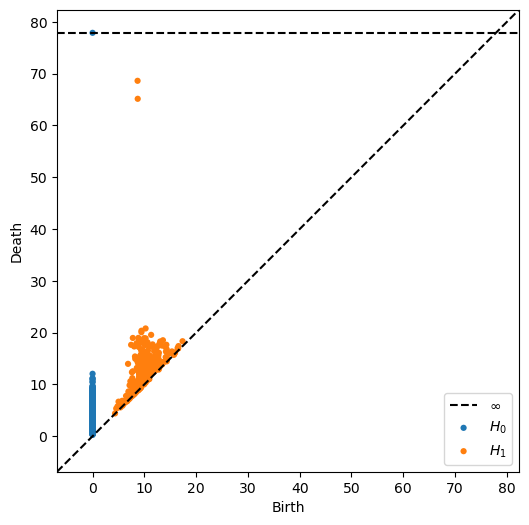

In [80]:
output = pipeline_trans(image_function = p6, num_pixels = 40 , window_size = 50, n_isos = 1000, x_translate= 1000 , y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

In [81]:
persistent_H1_intervals(output)

[59.94032382965088,
 56.43416500091553,
 11.196013927459717,
 10.921116828918457,
 10.647380828857422,
 10.566208839416504,
 10.197125911712646,
 10.136691093444824,
 9.64491081237793,
 9.452126502990723,
 9.288389205932617,
 9.279105186462402,
 9.013626098632812,
 8.979870796203613,
 8.701838493347168,
 8.64823055267334,
 8.305070877075195,
 8.256879806518555,
 7.771191596984863,
 7.51629638671875,
 7.440631866455078,
 7.382142066955566,
 7.203189849853516,
 7.118756294250488,
 7.013999938964844,
 6.860910415649414,
 6.704327583312988,
 6.40830135345459,
 6.382404327392578,
 6.334153175354004,
 6.138580322265625,
 6.116000175476074,
 5.929988861083984,
 5.89505672454834,
 5.86482048034668,
 5.838656425476074,
 5.678081512451172,
 5.645683288574219,
 5.615630149841309,
 5.590823173522949,
 5.391561508178711,
 5.330550193786621,
 5.319950103759766,
 5.237637519836426,
 5.208500862121582,
 5.182092666625977,
 4.938608169555664,
 4.905880928039551,
 4.868194580078125,
 4.865578651428223,
